## Sentiment Analysis on Twitter Comments.

    - Libraries are important and we call them to perform the different actions on our data and for training the models.
    - Its a first step to load the library to perform the specific task
    - For data preprocessing, we will be using Natural Language Processing’s (NLP) NLTK(Natural Language Toolkit) library.

##### Importing Necessary Libraries.

In [1]:
import re, numpy as np, pandas as pd
import seaborn as sns, plotly.express as px
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

from autocorrect import Speller
import string, nltk, contractions
from string import punctuation
from unidecode import unidecode
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,  PorterStemmer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

##### Now lets load the DataSet.

In [2]:
sen_df = pd.read_csv('noemoticon.csv', encoding = "ISO-8859-1")
sen_df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
sen_df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
sen_df.head()


,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


##### Exploratory Data Analysis!

In [4]:
sen_df.shape

(1599999, 6)

In [5]:
sen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
null_val = sen_df.isnull().sum()
null_val[null_val > 0]

Series([], dtype: int64)

In [7]:
sen_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,1599999.0,2.000001e+00,2.000001e+00,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
ids,1599999.0,1.998818e+09,1.935757e+08,1.467811e+09,1.956916e+09,2.002102e+09,2.177059e+09,2.329206e+09


In [8]:
sen_df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [9]:
len(sen_df)

1599999

In [10]:
print('Count of columns in the data is:  ', len(sen_df.columns))
print('Count of rows in the data is:  ', len(sen_df))

Count of columns in the data is:   6
Count of rows in the data is:   1599999


In [11]:
sen_df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [12]:
sen_df['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

In [13]:
sen_df['target'].nunique()

2

     Lets visualize it.

<Axes: xlabel='target', ylabel='count'>

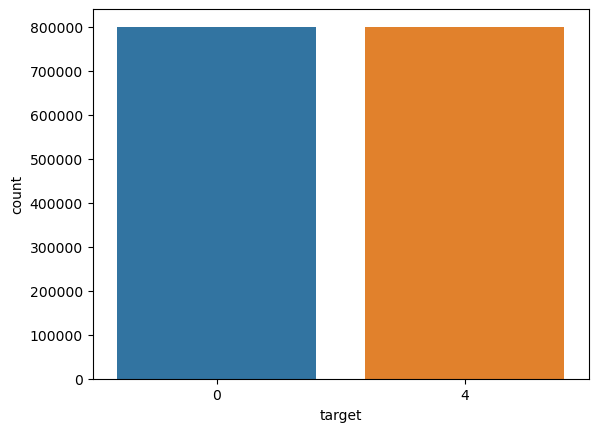

In [14]:
sns.countplot(x = 'target', data = sen_df)

    The bar chart shows an imbalance with category 4 having 800,000 instances and 0 having 799,999, 
    basically in the same ratio.
    
##### Lets work on the NLP Case Study and have to nake the Model.

In [15]:
main_df = sen_df[['text', 'target']]
main_df.head()

,text,target
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [16]:
main_df['target'] = main_df['target'].replace(4, 1)

In [17]:
main_df['target'].unique()

array([0, 1], dtype=int64)

In [18]:
main_df['text'] = main_df['text'].str.lower()
main_df['text'].head()

0    is upset that he can't update his facebook by ...
1    @kenichan i dived many times for the ball. man...
2      my whole body feels itchy and like its on fire 
3    @nationwideclass no, it's not behaving at all....
4                        @kwesidei not the whole crew 
Name: text, dtype: object

    Import the Libraries  nltk string re

In [19]:
# 1. Remove spaces and newlines
def remove_spaces(data):
    clean_text = data.replace('\\n', ' ').replace('\t', ' ').replace('\\', ' ')
    return clean_text

# 2. Contraction Mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3. Handling Accented Characters
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning stopwords from text
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])

# 5. Cleaning and removing punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# 6. Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

# 7. Cleaning URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)

# 8. Autocorrection (optional, if required)
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 9. Clean and Tokenize the text (after stopwords, punctuation removal)
def clean_data(data):
    tokens = word_tokenize(data)  # list of words
    clean_text = [word.lower() for word in tokens if word not in string.punctuation and len(word) >= 2 and word.isalpha()]
    return clean_text

# 10. Apply stemming
def stemming_on_text(data):
    st = PorterStemmer()
    text = [st.stem(word) for word in data]
    return " ".join(text)

# 11. Apply lemmatization
def lemmatizer_on_text(data):
    lm = WordNetLemmatizer()
    text = [lm.lemmatize(word) for word in data]
    return " ".join(text)


In [20]:
# Step 1: Remove spaces, newlines
main_df['text'] = main_df['text'].apply(lambda text: remove_spaces(text))  # Removing extra spaces/newlines
print("Removed spaces and newlines...")

# Step 2: Expand contractions
main_df['text'] = main_df['text'].apply(lambda text: expand_text(text))  # Expanding contractions
print("Expanded contractions...")

# Step 3: Handle accented characters
main_df['text'] = main_df['text'].apply(lambda text: handling_accented(text))  # Handling accented characters
print("Handled accented characters...")

# Step 4: Removing stopwords
main_df['text'] = main_df['text'].apply(lambda text: cleaning_stopwords(text))  # Removing stopwords
print("Removed stopwords...")

# Step 5: Removing punctuation
main_df['text'] = main_df['text'].apply(lambda x: cleaning_punctuations(x))  # Removing punctuation
print("Removed punctuation...")

# Step 7: Removing URLs
main_df['text'] = main_df['text'].apply(lambda x: cleaning_URLs(x))  # Removing URLs
print("Removed URLs...")

# Step 8: Removing numbers
main_df['text'] = main_df['text'].apply(lambda x: cleaning_numbers(x))  # Removing numbers
print("Removed numbers...")

# Step 9: Tokenize the text
tokenizer = RegexpTokenizer(r'\w+')  # Use regex to tokenize text
main_df['text'] = main_df['text'].apply(tokenizer.tokenize)
print("Tokenized text...")

# Step 10: Apply lemmenizing
main_df['text'] = main_df['text'].apply(lambda x: lemmatizer_on_text(x))  # Applying stemming
print("Applied lemmenizing...")


Removed spaces and newlines...
Expanded contractions...
Handled accented characters...
Removed stopwords...
Removed punctuation...
Removed URLs...
Removed numbers...
Tokenized text...
Applied lemmenizing...


In [21]:
main_df['text']

0          upset cannot update facebook texting it might ...
1          kenichan dived many time ball managed save res...
2                            whole body feel itchy like fire
3          nationwideclass no behaving all mad here canno...
4                                        kwesidei whole crew
                                 ...                        
1599994                     woke up school best feeling ever
1599995    thewdbcom cool hear old walt interview a httpb...
1599996                       ready mojo makeover ask detail
1599997    happy th birthday boo alll time tupac amaru sh...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

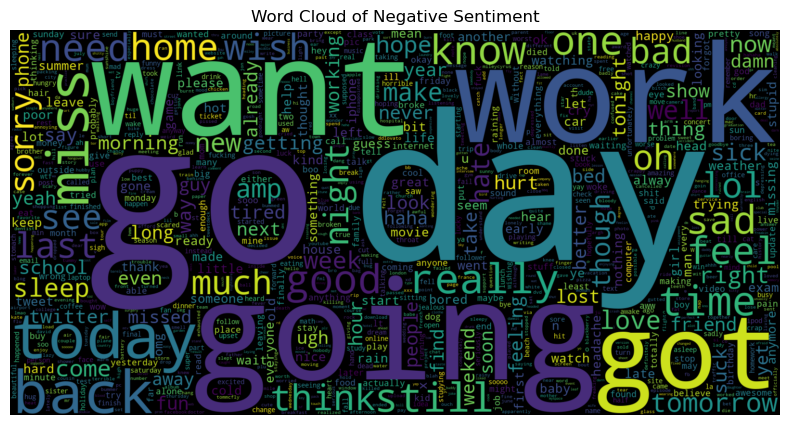

In [22]:
data_neg = main_df[main_df['target'] == 0]['text']  # Filter by target == 0

# Generate the word cloud
plt.figure(figsize=(10, 5))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))

# Display the word cloud
plt.title('Word Cloud of Negative Sentiment')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide the axes for better visualization
plt.show()


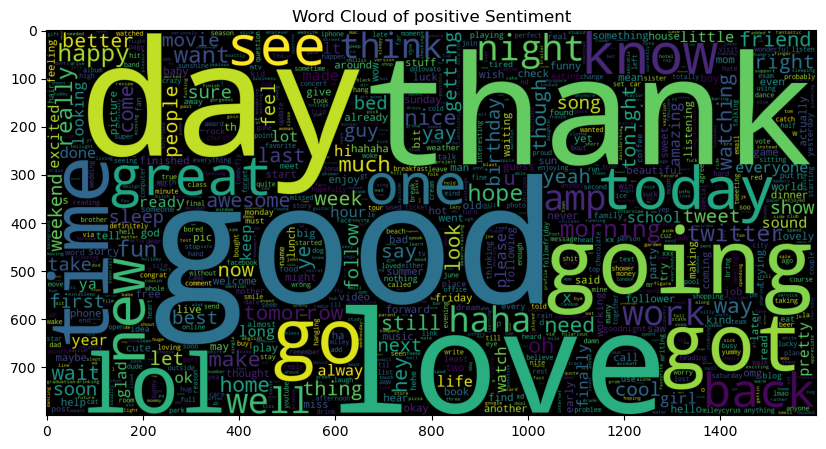

In [23]:
data_pos = main_df['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (10,5))
plt.title('Word Cloud of positive Sentiment')
plt.imshow(wc)

#####  Working on model to get insights.

In [24]:
df_x = main_df['text']
df_y = main_df['target']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.05, random_state = 286348)

In [26]:
# pd.DataFrame(x_train.A, columns = count.get_feature_names_out())

In [27]:
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, stop_words='english')
x_train_tfidf = vectoriser.fit_transform(x_train)
num_features = len(vectoriser.get_feature_names_out())
print(f'No. of feature words: {num_features}')

No. of feature words: 50000


In [28]:
x_test_tfidf = vectoriser.transform(x_test)

model = LogisticRegression()
model = model.fit(x_train_tfidf, y_train)

In [29]:
y_train_pred = model.predict(x_train_tfidf)
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print("Value of confusion_matrix : ", confusion_matrix(y_train, y_train_pred))
print("Value of classification_report : ", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.7879386762754449
Value of confusion_matrix :  [[579464 180560]
 [141773 618202]]
Value of classification_report :                precision    recall  f1-score   support

           0       0.80      0.76      0.78    760024
           1       0.77      0.81      0.79    759975

    accuracy                           0.79   1519999
   macro avg       0.79      0.79      0.79   1519999
weighted avg       0.79      0.79      0.79   1519999



In [30]:
print("\nTraining Bernoulli Naive Bayes...")
bnb_model = BernoulliNB()
bnb_model.fit(x_train_tfidf, y_train)

# Predict on the training set
y_train_pred_bnb = bnb_model.predict(x_train_tfidf)

# Print evaluation metrics for Bernoulli Naive Bayes
print("Bernoulli Naive Bayes Accuracy Score: ", accuracy_score(y_train, y_train_pred_bnb))
print("Bernoulli Naive Bayes Confusion Matrix: \n", confusion_matrix(y_train, y_train_pred_bnb))
print("Bernoulli Naive Bayes Classification Report: \n", classification_report(y_train, y_train_pred_bnb))



Training Bernoulli Naive Bayes...
Bernoulli Naive Bayes Accuracy Score:  0.7706906386122623
Bernoulli Naive Bayes Confusion Matrix: 
 [[569720 190304]
 [158246 601729]]
Bernoulli Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.77    760024
           1       0.76      0.79      0.78    759975

    accuracy                           0.77   1519999
   macro avg       0.77      0.77      0.77   1519999
weighted avg       0.77      0.77      0.77   1519999



##### Thanku 